In [1]:
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation

In [3]:
#1. 데이터셋 생성하기
(xTrain,yTrain),(xTest,yTest) = mnist.load_data()

In [4]:
xTrain = xTrain.reshape(60000,784).astype('float32')/255.0
xTest = xTest.reshape(10000,784).astype('float32')/255.0

In [5]:
yTrain
yTrain = np_utils.to_categorical(yTrain) #원핫인코딩
yTest = np_utils.to_categorical(yTest)

In [6]:
#2. 모델구성
model = Sequential()
model.model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


C:\Users\student\Anaconda3\lib\site-packages\keras\engine\sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [7]:
#3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
#4. 모델 학습
hist = model.fit(xTrain, yTrain, epochs=5, batch_size=32)
#batch_size: 몇 개의 샘플로 가중치를 갱신할 것인가(얼마나 빈번하게 업데이트 되는지)


Epoch 1/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.6684 - accuracy: 0.8253
Epoch 2/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.3468 - accuracy: 0.9020
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.3002 - accuracy: 0.9145
Epoch 4/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.2712 - accuracy: 0.9226
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2498 - accuracy: 0.9288


In [9]:
#5. cost, 정확도 확인
print(hist.history['loss'])
print(hist.history['accuracy'])

[0.6683644861777623, 0.34676237959861755, 0.30020022093256316, 0.27120461085836095, 0.2497716275791327]
[0.82531667, 0.9020333, 0.9145, 0.92256665, 0.9288]


In [10]:
#6. 모델 평가
res = model.evaluate(xTest, yTest, batch_size=32)
print(res)

10000/10000 [==============================] - 0s 17us/step
[0.23305894895493984, 0.9312999844551086]


In [11]:
# 모델 예측
xhat = xTest[0:1]
yhat = model.predict(xhat)
print(yhat)

[[1.44443766e-04 8.79309496e-08 8.14641244e-04 3.29171331e-03
  2.02963815e-06 1.10893568e-04 1.16152684e-07 9.94709373e-01
  1.39497588e-05 9.12675576e-04]]


In [12]:
import numpy as np
np.random.seed(3)

In [13]:
(xTrain,yTrain),(xTest,yTest) = mnist.load_data()

In [14]:
xVal = xTrain[50000:]
yVal = yTrain[50000:]
xTrain = xTrain[:50000]
yTrain = yTrain[:50000]

In [15]:
xTrain = xTrain.reshape(50000,784).astype('float32')/255.0
xVal = xVal.reshape(10000,784).astype('float32')/255.0
xTest = xTest.reshape(10000,784).astype('float32')/255.0

In [16]:
#훈련, 검증 데이터 선택
tri = np.random.choice(50000,700) #0~49999 중에 700개 랜덤 중복 추출
vri = np.random.choice(10000,300)

In [17]:
xTrain = xTrain[tri] #700건
yTrain = yTrain[tri]
xVal = xVal[vri] #300건
yVal = yVal[vri]

In [18]:
#카테고리 형태로 변환
yTrain = np_utils.to_categorical(yTrain) 
yVal = np_utils.to_categorical(yVal)
yTest = np_utils.to_categorical(yTest)

In [19]:
#모델
model = Sequential()
model.add(Dense(input_dim=28*28, units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
#모델 학습
hist = model.fit(xTrain,yTrain,epochs=3000, batch_size=10, validation_data=(xVal,yVal))

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 210us/step - loss: 2.2576 - accuracy: 0.1643 - val_loss: 2.2272 - val_accuracy: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 206us/step - loss: 2.2072 - accuracy: 0.1657 - val_loss: 2.1908 - val_accuracy: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 134us/step - loss: 2.1730 - accuracy: 0.1729 - val_loss: 2.1631 - val_accuracy: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 104us/step - loss: 2.1441 - accuracy: 0.1786 - val_loss: 2.1372 - val_accuracy: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 100us/step - loss: 2.1177 - accuracy: 0.1900 - val_loss: 2.1141 - val_accuracy: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 119us/step - loss: 2.0940 - accuracy: 0.2029 - val_loss: 2.0931 - val_accuracy: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 94us/step - loss: 2

Epoch 57/3000
700/700 [==============================] - 0s 136us/step - loss: 1.7641 - accuracy: 0.2714 - val_loss: 1.8390 - val_accuracy: 0.2167
Epoch 58/3000
700/700 [==============================] - 0s 121us/step - loss: 1.7616 - accuracy: 0.2557 - val_loss: 1.8347 - val_accuracy: 0.2267
Epoch 59/3000
700/700 [==============================] - 0s 149us/step - loss: 1.7590 - accuracy: 0.2671 - val_loss: 1.8329 - val_accuracy: 0.2233
Epoch 60/3000
700/700 [==============================] - 0s 116us/step - loss: 1.7552 - accuracy: 0.2614 - val_loss: 1.8256 - val_accuracy: 0.2500
Epoch 61/3000
700/700 [==============================] - 0s 106us/step - loss: 1.7566 - accuracy: 0.2814 - val_loss: 1.8336 - val_accuracy: 0.2400
Epoch 62/3000
700/700 [==============================] - 0s 107us/step - loss: 1.7531 - accuracy: 0.2729 - val_loss: 1.8312 - val_accuracy: 0.2267
Epoch 63/3000
700/700 [==============================] - 0s 113us/step - loss: 1.7505 - accuracy: 0.2857 - val_loss: 1

Epoch 113/3000
700/700 [==============================] - 0s 81us/step - loss: 1.6737 - accuracy: 0.3100 - val_loss: 1.8196 - val_accuracy: 0.2300
Epoch 114/3000
700/700 [==============================] - 0s 91us/step - loss: 1.6724 - accuracy: 0.3014 - val_loss: 1.8221 - val_accuracy: 0.2300
Epoch 115/3000
700/700 [==============================] - 0s 93us/step - loss: 1.6711 - accuracy: 0.3071 - val_loss: 1.8128 - val_accuracy: 0.2333
Epoch 116/3000
700/700 [==============================] - 0s 96us/step - loss: 1.6703 - accuracy: 0.3157 - val_loss: 1.8255 - val_accuracy: 0.2300
Epoch 117/3000
700/700 [==============================] - 0s 101us/step - loss: 1.6694 - accuracy: 0.3100 - val_loss: 1.8228 - val_accuracy: 0.2333
Epoch 118/3000
700/700 [==============================] - 0s 90us/step - loss: 1.6682 - accuracy: 0.3114 - val_loss: 1.8262 - val_accuracy: 0.2333
Epoch 119/3000
700/700 [==============================] - 0s 68us/step - loss: 1.6670 - accuracy: 0.3257 - val_loss: 

700/700 [==============================] - 0s 90us/step - loss: 1.5844 - accuracy: 0.3443 - val_loss: 1.8615 - val_accuracy: 0.2600
Epoch 224/3000
700/700 [==============================] - 0s 89us/step - loss: 1.5845 - accuracy: 0.3529 - val_loss: 1.8766 - val_accuracy: 0.2467
Epoch 225/3000
700/700 [==============================] - 0s 91us/step - loss: 1.5833 - accuracy: 0.3457 - val_loss: 1.8572 - val_accuracy: 0.2167
Epoch 226/3000
700/700 [==============================] - 0s 106us/step - loss: 1.5835 - accuracy: 0.3486 - val_loss: 1.8686 - val_accuracy: 0.2233
Epoch 227/3000
700/700 [==============================] - 0s 93us/step - loss: 1.5825 - accuracy: 0.3486 - val_loss: 1.8611 - val_accuracy: 0.2133
Epoch 228/3000
700/700 [==============================] - 0s 91us/step - loss: 1.5825 - accuracy: 0.3443 - val_loss: 1.8693 - val_accuracy: 0.2267
Epoch 229/3000
700/700 [==============================] - 0s 96us/step - loss: 1.5801 - accuracy: 0.3471 - val_loss: 1.8688 - val_ac

Epoch 279/3000
700/700 [==============================] - 0s 116us/step - loss: 1.5559 - accuracy: 0.3571 - val_loss: 1.8859 - val_accuracy: 0.2167
Epoch 280/3000
700/700 [==============================] - 0s 106us/step - loss: 1.5559 - accuracy: 0.3700 - val_loss: 1.8876 - val_accuracy: 0.2167
Epoch 281/3000
700/700 [==============================] - 0s 99us/step - loss: 1.5541 - accuracy: 0.3586 - val_loss: 1.8906 - val_accuracy: 0.2333
Epoch 282/3000
700/700 [==============================] - 0s 100us/step - loss: 1.5553 - accuracy: 0.3671 - val_loss: 1.8840 - val_accuracy: 0.2133
Epoch 283/3000
700/700 [==============================] - 0s 101us/step - loss: 1.5543 - accuracy: 0.3557 - val_loss: 1.8927 - val_accuracy: 0.2167
Epoch 284/3000
700/700 [==============================] - 0s 100us/step - loss: 1.5542 - accuracy: 0.3614 - val_loss: 1.8936 - val_accuracy: 0.2567
Epoch 285/3000
700/700 [==============================] - 0s 100us/step - loss: 1.5535 - accuracy: 0.3557 - val_l

Epoch 390/3000
700/700 [==============================] - 0s 127us/step - loss: 1.5125 - accuracy: 0.3671 - val_loss: 1.9572 - val_accuracy: 0.2400
Epoch 391/3000
700/700 [==============================] - 0s 113us/step - loss: 1.5132 - accuracy: 0.3757 - val_loss: 1.9539 - val_accuracy: 0.2367
Epoch 392/3000
700/700 [==============================] - 0s 87us/step - loss: 1.5137 - accuracy: 0.3714 - val_loss: 1.9599 - val_accuracy: 0.2233
Epoch 393/3000
700/700 [==============================] - 0s 86us/step - loss: 1.5137 - accuracy: 0.3757 - val_loss: 1.9730 - val_accuracy: 0.2233
Epoch 394/3000
700/700 [==============================] - 0s 94us/step - loss: 1.5136 - accuracy: 0.3757 - val_loss: 1.9565 - val_accuracy: 0.2267
Epoch 395/3000
700/700 [==============================] - 0s 89us/step - loss: 1.5132 - accuracy: 0.3771 - val_loss: 1.9565 - val_accuracy: 0.2167
Epoch 396/3000
700/700 [==============================] - 0s 91us/step - loss: 1.5124 - accuracy: 0.3771 - val_loss:

Epoch 501/3000
700/700 [==============================] - 0s 110us/step - loss: 1.4782 - accuracy: 0.4000 - val_loss: 2.0378 - val_accuracy: 0.2300
Epoch 502/3000
700/700 [==============================] - 0s 107us/step - loss: 1.4760 - accuracy: 0.3943 - val_loss: 2.0391 - val_accuracy: 0.2267
Epoch 503/3000
700/700 [==============================] - 0s 107us/step - loss: 1.4766 - accuracy: 0.3957 - val_loss: 2.0315 - val_accuracy: 0.2267
Epoch 504/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4757 - accuracy: 0.3971 - val_loss: 2.0373 - val_accuracy: 0.2267
Epoch 505/3000
700/700 [==============================] - 0s 103us/step - loss: 1.4754 - accuracy: 0.3957 - val_loss: 2.0319 - val_accuracy: 0.2400
Epoch 506/3000
700/700 [==============================] - 0s 87us/step - loss: 1.4754 - accuracy: 0.3986 - val_loss: 2.0256 - val_accuracy: 0.2300
Epoch 507/3000
700/700 [==============================] - 0s 86us/step - loss: 1.4769 - accuracy: 0.3986 - val_lo

Epoch 557/3000
700/700 [==============================] - 0s 91us/step - loss: 1.4614 - accuracy: 0.4114 - val_loss: 2.0831 - val_accuracy: 0.2500
Epoch 558/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4631 - accuracy: 0.4029 - val_loss: 2.0614 - val_accuracy: 0.2333
Epoch 559/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4614 - accuracy: 0.4029 - val_loss: 2.0657 - val_accuracy: 0.2533
Epoch 560/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4612 - accuracy: 0.4014 - val_loss: 2.0698 - val_accuracy: 0.2567
Epoch 561/3000
700/700 [==============================] - 0s 90us/step - loss: 1.4623 - accuracy: 0.4100 - val_loss: 2.0637 - val_accuracy: 0.2267
Epoch 562/3000
700/700 [==============================] - 0s 91us/step - loss: 1.4619 - accuracy: 0.4029 - val_loss: 2.0546 - val_accuracy: 0.2300
Epoch 563/3000
700/700 [==============================] - 0s 90us/step - loss: 1.4613 - accuracy: 0.4000 - val_loss: 2

Epoch 668/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4375 - accuracy: 0.4157 - val_loss: 2.1405 - val_accuracy: 0.2567
Epoch 669/3000
700/700 [==============================] - 0s 91us/step - loss: 1.4382 - accuracy: 0.4157 - val_loss: 2.1450 - val_accuracy: 0.2333
Epoch 670/3000
700/700 [==============================] - 0s 89us/step - loss: 1.4393 - accuracy: 0.4171 - val_loss: 2.1303 - val_accuracy: 0.2333
Epoch 671/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4377 - accuracy: 0.4157 - val_loss: 2.1282 - val_accuracy: 0.2533
Epoch 672/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4382 - accuracy: 0.4100 - val_loss: 2.1405 - val_accuracy: 0.2367
Epoch 673/3000
700/700 [==============================] - 0s 96us/step - loss: 1.4384 - accuracy: 0.4186 - val_loss: 2.1311 - val_accuracy: 0.2400
Epoch 674/3000
700/700 [==============================] - 0s 89us/step - loss: 1.4374 - accuracy: 0.4086 - val_loss: 2

Epoch 724/3000
700/700 [==============================] - 0s 96us/step - loss: 1.4281 - accuracy: 0.4257 - val_loss: 2.1736 - val_accuracy: 0.2367
Epoch 725/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4277 - accuracy: 0.4229 - val_loss: 2.1819 - val_accuracy: 0.2433
Epoch 726/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4278 - accuracy: 0.4257 - val_loss: 2.1563 - val_accuracy: 0.2367
Epoch 727/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4273 - accuracy: 0.4214 - val_loss: 2.1938 - val_accuracy: 0.2333
Epoch 728/3000
700/700 [==============================] - 0s 92us/step - loss: 1.4276 - accuracy: 0.4200 - val_loss: 2.1558 - val_accuracy: 0.2400
Epoch 729/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4269 - accuracy: 0.4229 - val_loss: 2.1856 - val_accuracy: 0.2467
Epoch 730/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4269 - accuracy: 0.4257 - val_loss: 2

Epoch 780/3000
700/700 [==============================] - 0s 96us/step - loss: 1.4190 - accuracy: 0.4229 - val_loss: 2.1879 - val_accuracy: 0.2400
Epoch 781/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4196 - accuracy: 0.4214 - val_loss: 2.1973 - val_accuracy: 0.2467
Epoch 782/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4184 - accuracy: 0.4257 - val_loss: 2.1738 - val_accuracy: 0.2400
Epoch 783/3000
700/700 [==============================] - 0s 96us/step - loss: 1.4186 - accuracy: 0.4329 - val_loss: 2.2047 - val_accuracy: 0.2433
Epoch 784/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4181 - accuracy: 0.4300 - val_loss: 2.2132 - val_accuracy: 0.2400
Epoch 785/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4179 - accuracy: 0.4271 - val_loss: 2.2198 - val_accuracy: 0.2367
Epoch 786/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4180 - accuracy: 0.4271 - val_loss: 2

Epoch 836/3000
700/700 [==============================] - 0s 103us/step - loss: 1.4098 - accuracy: 0.4271 - val_loss: 2.2383 - val_accuracy: 0.2500
Epoch 837/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4102 - accuracy: 0.4300 - val_loss: 2.2211 - val_accuracy: 0.2433
Epoch 838/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4107 - accuracy: 0.4329 - val_loss: 2.2368 - val_accuracy: 0.2367
Epoch 839/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4088 - accuracy: 0.4300 - val_loss: 2.2353 - val_accuracy: 0.2367
Epoch 840/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4081 - accuracy: 0.4343 - val_loss: 2.2224 - val_accuracy: 0.2433
Epoch 841/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4092 - accuracy: 0.4371 - val_loss: 2.2331 - val_accuracy: 0.2367
Epoch 842/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4098 - accuracy: 0.4271 - val_loss: 

Epoch 892/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4024 - accuracy: 0.4357 - val_loss: 2.2699 - val_accuracy: 0.2433
Epoch 893/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4018 - accuracy: 0.4357 - val_loss: 2.2777 - val_accuracy: 0.2433
Epoch 894/3000
700/700 [==============================] - 0s 92us/step - loss: 1.4020 - accuracy: 0.4429 - val_loss: 2.2620 - val_accuracy: 0.2400
Epoch 895/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4012 - accuracy: 0.4343 - val_loss: 2.2655 - val_accuracy: 0.2467
Epoch 896/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4014 - accuracy: 0.4357 - val_loss: 2.2715 - val_accuracy: 0.2600
Epoch 897/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4017 - accuracy: 0.4343 - val_loss: 2.2648 - val_accuracy: 0.2533
Epoch 898/3000
700/700 [==============================] - 0s 94us/step - loss: 1.4011 - accuracy: 0.4386 - val_loss: 2

Epoch 948/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3940 - accuracy: 0.4300 - val_loss: 2.2777 - val_accuracy: 0.2367
Epoch 949/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3938 - accuracy: 0.4471 - val_loss: 2.2906 - val_accuracy: 0.2400
Epoch 950/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3929 - accuracy: 0.4386 - val_loss: 2.2916 - val_accuracy: 0.2367
Epoch 951/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3940 - accuracy: 0.4429 - val_loss: 2.3014 - val_accuracy: 0.2500
Epoch 952/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3938 - accuracy: 0.4414 - val_loss: 2.2949 - val_accuracy: 0.2467
Epoch 953/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3935 - accuracy: 0.4371 - val_loss: 2.3148 - val_accuracy: 0.2533
Epoch 954/3000
700/700 [==============================] - 0s 103us/step - loss: 1.3940 - accuracy: 0.4471 - val_loss: 

700/700 [==============================] - 0s 94us/step - loss: 1.3813 - accuracy: 0.4414 - val_loss: 2.3657 - val_accuracy: 0.2533
Epoch 1059/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3797 - accuracy: 0.4486 - val_loss: 2.3663 - val_accuracy: 0.2500
Epoch 1060/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3802 - accuracy: 0.4443 - val_loss: 2.3557 - val_accuracy: 0.2500
Epoch 1061/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3807 - accuracy: 0.4457 - val_loss: 2.3787 - val_accuracy: 0.2533
Epoch 1062/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3811 - accuracy: 0.4386 - val_loss: 2.3482 - val_accuracy: 0.2500
Epoch 1063/3000
700/700 [==============================] - 0s 92us/step - loss: 1.3797 - accuracy: 0.4429 - val_loss: 2.3524 - val_accuracy: 0.2533
Epoch 1064/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3799 - accuracy: 0.4429 - val_loss: 2.3675 - v

700/700 [==============================] - 0s 94us/step - loss: 1.3688 - accuracy: 0.4529 - val_loss: 2.4140 - val_accuracy: 0.2333
Epoch 1169/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3682 - accuracy: 0.4529 - val_loss: 2.4288 - val_accuracy: 0.2467
Epoch 1170/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3682 - accuracy: 0.4514 - val_loss: 2.4249 - val_accuracy: 0.2467
Epoch 1171/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3676 - accuracy: 0.4514 - val_loss: 2.4115 - val_accuracy: 0.2433
Epoch 1172/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3681 - accuracy: 0.4529 - val_loss: 2.4387 - val_accuracy: 0.2433
Epoch 1173/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3678 - accuracy: 0.4514 - val_loss: 2.4268 - val_accuracy: 0.2300
Epoch 1174/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3688 - accuracy: 0.4471 - val_loss: 2.4151 - v

700/700 [==============================] - 0s 90us/step - loss: 1.3575 - accuracy: 0.4614 - val_loss: 2.5011 - val_accuracy: 0.2467
Epoch 1279/3000
700/700 [==============================] - 0s 89us/step - loss: 1.3575 - accuracy: 0.4557 - val_loss: 2.4813 - val_accuracy: 0.2400
Epoch 1280/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3577 - accuracy: 0.4614 - val_loss: 2.4975 - val_accuracy: 0.2433
Epoch 1281/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3572 - accuracy: 0.4514 - val_loss: 2.4804 - val_accuracy: 0.2433
Epoch 1282/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3576 - accuracy: 0.4586 - val_loss: 2.4914 - val_accuracy: 0.2433
Epoch 1283/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3573 - accuracy: 0.4671 - val_loss: 2.5163 - val_accuracy: 0.2467
Epoch 1284/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3573 - accuracy: 0.4629 - val_loss: 2.5124 - v

700/700 [==============================] - 0s 90us/step - loss: 1.3481 - accuracy: 0.4657 - val_loss: 2.5517 - val_accuracy: 0.2433
Epoch 1389/3000
700/700 [==============================] - 0s 107us/step - loss: 1.3471 - accuracy: 0.4671 - val_loss: 2.5614 - val_accuracy: 0.2467
Epoch 1390/3000
700/700 [==============================] - 0s 100us/step - loss: 1.3481 - accuracy: 0.4657 - val_loss: 2.5490 - val_accuracy: 0.2433
Epoch 1391/3000
700/700 [==============================] - 0s 107us/step - loss: 1.3483 - accuracy: 0.4657 - val_loss: 2.5623 - val_accuracy: 0.2467
Epoch 1392/3000
700/700 [==============================] - 0s 86us/step - loss: 1.3483 - accuracy: 0.4600 - val_loss: 2.5656 - val_accuracy: 0.2400
Epoch 1393/3000
700/700 [==============================] - 0s 87us/step - loss: 1.3475 - accuracy: 0.4700 - val_loss: 2.5671 - val_accuracy: 0.2467
Epoch 1394/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3463 - accuracy: 0.4586 - val_loss: 2.5563 

700/700 [==============================] - 0s 90us/step - loss: 1.3387 - accuracy: 0.4743 - val_loss: 2.6393 - val_accuracy: 0.2500
Epoch 1499/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3395 - accuracy: 0.4700 - val_loss: 2.6042 - val_accuracy: 0.2467
Epoch 1500/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3388 - accuracy: 0.4771 - val_loss: 2.6116 - val_accuracy: 0.2433
Epoch 1501/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3389 - accuracy: 0.4729 - val_loss: 2.6054 - val_accuracy: 0.2467
Epoch 1502/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3390 - accuracy: 0.4714 - val_loss: 2.6098 - val_accuracy: 0.2467
Epoch 1503/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3390 - accuracy: 0.4657 - val_loss: 2.6042 - val_accuracy: 0.2433
Epoch 1504/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3381 - accuracy: 0.4743 - val_loss: 2.6240 - v

700/700 [==============================] - 0s 90us/step - loss: 1.3294 - accuracy: 0.4786 - val_loss: 2.6625 - val_accuracy: 0.2467
Epoch 1609/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3308 - accuracy: 0.4786 - val_loss: 2.7004 - val_accuracy: 0.2500
Epoch 1610/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3312 - accuracy: 0.4729 - val_loss: 2.6731 - val_accuracy: 0.2433
Epoch 1611/3000
700/700 [==============================] - 0s 89us/step - loss: 1.3299 - accuracy: 0.4743 - val_loss: 2.6899 - val_accuracy: 0.2433
Epoch 1612/3000
700/700 [==============================] - 0s 87us/step - loss: 1.3306 - accuracy: 0.4729 - val_loss: 2.6726 - val_accuracy: 0.2433
Epoch 1613/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3300 - accuracy: 0.4743 - val_loss: 2.6727 - val_accuracy: 0.2333
Epoch 1614/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3304 - accuracy: 0.4700 - val_loss: 2.6780 - v

700/700 [==============================] - 0s 87us/step - loss: 1.3229 - accuracy: 0.4886 - val_loss: 2.7441 - val_accuracy: 0.2467
Epoch 1719/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3224 - accuracy: 0.4857 - val_loss: 2.6847 - val_accuracy: 0.2433
Epoch 1720/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3212 - accuracy: 0.4814 - val_loss: 2.7311 - val_accuracy: 0.2433
Epoch 1721/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3220 - accuracy: 0.4800 - val_loss: 2.7231 - val_accuracy: 0.2433
Epoch 1722/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3227 - accuracy: 0.4757 - val_loss: 2.7074 - val_accuracy: 0.2400
Epoch 1723/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3219 - accuracy: 0.4800 - val_loss: 2.7116 - val_accuracy: 0.2400
Epoch 1724/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3210 - accuracy: 0.4857 - val_loss: 2.7300 - v

700/700 [==============================] - 0s 94us/step - loss: 1.3131 - accuracy: 0.4843 - val_loss: 2.7838 - val_accuracy: 0.2433
Epoch 1829/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3153 - accuracy: 0.4800 - val_loss: 2.7718 - val_accuracy: 0.2433
Epoch 1830/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3139 - accuracy: 0.4843 - val_loss: 2.7901 - val_accuracy: 0.2433
Epoch 1831/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3138 - accuracy: 0.4871 - val_loss: 2.7782 - val_accuracy: 0.2400
Epoch 1832/3000
700/700 [==============================] - 0s 87us/step - loss: 1.3138 - accuracy: 0.4857 - val_loss: 2.7998 - val_accuracy: 0.2467
Epoch 1833/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3136 - accuracy: 0.4843 - val_loss: 2.8160 - val_accuracy: 0.2433
Epoch 1834/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3137 - accuracy: 0.4814 - val_loss: 2.8138 - v

700/700 [==============================] - 0s 90us/step - loss: 1.3071 - accuracy: 0.4886 - val_loss: 2.8680 - val_accuracy: 0.2467
Epoch 1939/3000
700/700 [==============================] - 0s 87us/step - loss: 1.3071 - accuracy: 0.4929 - val_loss: 2.8414 - val_accuracy: 0.2467
Epoch 1940/3000
700/700 [==============================] - 0s 89us/step - loss: 1.3071 - accuracy: 0.4914 - val_loss: 2.8538 - val_accuracy: 0.2467
Epoch 1941/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3066 - accuracy: 0.4857 - val_loss: 2.8291 - val_accuracy: 0.2467
Epoch 1942/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3066 - accuracy: 0.4914 - val_loss: 2.8601 - val_accuracy: 0.2467
Epoch 1943/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3066 - accuracy: 0.4900 - val_loss: 2.8644 - val_accuracy: 0.2467
Epoch 1944/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3065 - accuracy: 0.4929 - val_loss: 2.8741 - 

700/700 [==============================] - 0s 104us/step - loss: 1.3000 - accuracy: 0.4943 - val_loss: 2.8693 - val_accuracy: 0.2433
Epoch 2049/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3026 - accuracy: 0.4929 - val_loss: 2.9239 - val_accuracy: 0.2467
Epoch 2050/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3009 - accuracy: 0.4900 - val_loss: 2.9248 - val_accuracy: 0.2433
Epoch 2051/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3010 - accuracy: 0.4929 - val_loss: 2.8964 - val_accuracy: 0.2400
Epoch 2052/3000
700/700 [==============================] - 0s 89us/step - loss: 1.3012 - accuracy: 0.4943 - val_loss: 2.8942 - val_accuracy: 0.2433
Epoch 2053/3000
700/700 [==============================] - 0s 100us/step - loss: 1.3008 - accuracy: 0.4900 - val_loss: 2.8887 - val_accuracy: 0.2400
Epoch 2054/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3000 - accuracy: 0.4971 - val_loss: 2.9069 

700/700 [==============================] - 0s 93us/step - loss: 1.2944 - accuracy: 0.4971 - val_loss: 3.0044 - val_accuracy: 0.2433
Epoch 2159/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2942 - accuracy: 0.4971 - val_loss: 2.9445 - val_accuracy: 0.2467
Epoch 2160/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2951 - accuracy: 0.4943 - val_loss: 2.9919 - val_accuracy: 0.2467
Epoch 2161/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2946 - accuracy: 0.5014 - val_loss: 2.9727 - val_accuracy: 0.2467
Epoch 2162/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2941 - accuracy: 0.4929 - val_loss: 2.9620 - val_accuracy: 0.2400
Epoch 2163/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2946 - accuracy: 0.4914 - val_loss: 2.9412 - val_accuracy: 0.2433
Epoch 2164/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2953 - accuracy: 0.4986 - val_loss: 2.9747 - 

700/700 [==============================] - 0s 90us/step - loss: 1.2891 - accuracy: 0.4986 - val_loss: 2.9907 - val_accuracy: 0.2433
Epoch 2269/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2879 - accuracy: 0.4971 - val_loss: 3.0618 - val_accuracy: 0.2500
Epoch 2270/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2895 - accuracy: 0.5014 - val_loss: 3.0078 - val_accuracy: 0.2533
Epoch 2271/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2893 - accuracy: 0.4929 - val_loss: 3.0545 - val_accuracy: 0.2433
Epoch 2272/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2883 - accuracy: 0.4971 - val_loss: 3.0627 - val_accuracy: 0.2433
Epoch 2273/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2890 - accuracy: 0.4971 - val_loss: 3.0107 - val_accuracy: 0.2433
Epoch 2274/3000
700/700 [==============================] - 0s 97us/step - loss: 1.2892 - accuracy: 0.4957 - val_loss: 3.0373 - 

700/700 [==============================] - 0s 97us/step - loss: 1.2836 - accuracy: 0.5014 - val_loss: 3.0401 - val_accuracy: 0.2467
Epoch 2379/3000
700/700 [==============================] - 0s 97us/step - loss: 1.2840 - accuracy: 0.5000 - val_loss: 3.0907 - val_accuracy: 0.2433
Epoch 2380/3000
700/700 [==============================] - 0s 90us/step - loss: 1.2832 - accuracy: 0.5014 - val_loss: 3.0667 - val_accuracy: 0.2467
Epoch 2381/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2839 - accuracy: 0.5057 - val_loss: 3.0906 - val_accuracy: 0.2500
Epoch 2382/3000
700/700 [==============================] - 0s 89us/step - loss: 1.2836 - accuracy: 0.5014 - val_loss: 3.0918 - val_accuracy: 0.2467
Epoch 2383/3000
700/700 [==============================] - 0s 99us/step - loss: 1.2837 - accuracy: 0.5000 - val_loss: 3.0909 - val_accuracy: 0.2433
Epoch 2384/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2835 - accuracy: 0.4971 - val_loss: 3.0886 - v

700/700 [==============================] - 0s 106us/step - loss: 1.2786 - accuracy: 0.4957 - val_loss: 3.0929 - val_accuracy: 0.2467
Epoch 2489/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2799 - accuracy: 0.5014 - val_loss: 3.1603 - val_accuracy: 0.2400
Epoch 2490/3000
700/700 [==============================] - 0s 104us/step - loss: 1.2783 - accuracy: 0.5029 - val_loss: 3.1238 - val_accuracy: 0.2500
Epoch 2491/3000
700/700 [==============================] - 0s 104us/step - loss: 1.2789 - accuracy: 0.4986 - val_loss: 3.1475 - val_accuracy: 0.2367
Epoch 2492/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2796 - accuracy: 0.4986 - val_loss: 3.1347 - val_accuracy: 0.2467
Epoch 2493/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2787 - accuracy: 0.5029 - val_loss: 3.1816 - val_accuracy: 0.2400
Epoch 2494/3000
700/700 [==============================] - 0s 104us/step - loss: 1.2785 - accuracy: 0.4943 - val_loss: 3.13

700/700 [==============================] - 0s 97us/step - loss: 1.2733 - accuracy: 0.4986 - val_loss: 3.2180 - val_accuracy: 0.2467
Epoch 2599/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2740 - accuracy: 0.5029 - val_loss: 3.1791 - val_accuracy: 0.2367
Epoch 2600/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2734 - accuracy: 0.5057 - val_loss: 3.2008 - val_accuracy: 0.2433
Epoch 2601/3000
700/700 [==============================] - 0s 86us/step - loss: 1.2734 - accuracy: 0.5029 - val_loss: 3.1994 - val_accuracy: 0.2433
Epoch 2602/3000
700/700 [==============================] - 0s 94us/step - loss: 1.2745 - accuracy: 0.5086 - val_loss: 3.2144 - val_accuracy: 0.2433
Epoch 2603/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2737 - accuracy: 0.5057 - val_loss: 3.1867 - val_accuracy: 0.2433
Epoch 2604/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2734 - accuracy: 0.5057 - val_loss: 3.2175 - v

700/700 [==============================] - 0s 86us/step - loss: 1.2695 - accuracy: 0.5029 - val_loss: 3.2695 - val_accuracy: 0.2400
Epoch 2709/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2690 - accuracy: 0.5043 - val_loss: 3.2455 - val_accuracy: 0.2367
Epoch 2710/3000
700/700 [==============================] - 0s 86us/step - loss: 1.2696 - accuracy: 0.5000 - val_loss: 3.2431 - val_accuracy: 0.2367
Epoch 2711/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2698 - accuracy: 0.5057 - val_loss: 3.2415 - val_accuracy: 0.2433
Epoch 2712/3000
700/700 [==============================] - 0s 90us/step - loss: 1.2690 - accuracy: 0.5014 - val_loss: 3.2078 - val_accuracy: 0.2400
Epoch 2713/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2695 - accuracy: 0.5071 - val_loss: 3.2908 - val_accuracy: 0.2500
Epoch 2714/3000
700/700 [==============================] - 0s 89us/step - loss: 1.2691 - accuracy: 0.5029 - val_loss: 3.2943 - 

700/700 [==============================] - 0s 94us/step - loss: 1.2654 - accuracy: 0.5057 - val_loss: 3.3211 - val_accuracy: 0.2433
Epoch 2819/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2651 - accuracy: 0.5071 - val_loss: 3.3147 - val_accuracy: 0.2467
Epoch 2820/3000
700/700 [==============================] - 0s 97us/step - loss: 1.2657 - accuracy: 0.5057 - val_loss: 3.2952 - val_accuracy: 0.2367
Epoch 2821/3000
700/700 [==============================] - 0s 99us/step - loss: 1.2656 - accuracy: 0.5029 - val_loss: 3.3052 - val_accuracy: 0.2400
Epoch 2822/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2652 - accuracy: 0.5100 - val_loss: 3.3329 - val_accuracy: 0.2400
Epoch 2823/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2646 - accuracy: 0.5057 - val_loss: 3.3397 - val_accuracy: 0.2400
Epoch 2824/3000
700/700 [==============================] - 0s 90us/step - loss: 1.2645 - accuracy: 0.5086 - val_loss: 3.3356 -

700/700 [==============================] - 0s 104us/step - loss: 1.2611 - accuracy: 0.5100 - val_loss: 3.3681 - val_accuracy: 0.2433
Epoch 2929/3000
700/700 [==============================] - 0s 86us/step - loss: 1.2606 - accuracy: 0.5086 - val_loss: 3.3886 - val_accuracy: 0.2467
Epoch 2930/3000
700/700 [==============================] - 0s 90us/step - loss: 1.2604 - accuracy: 0.5057 - val_loss: 3.4308 - val_accuracy: 0.2467
Epoch 2931/3000
700/700 [==============================] - 0s 86us/step - loss: 1.2609 - accuracy: 0.5071 - val_loss: 3.4096 - val_accuracy: 0.2433
Epoch 2932/3000
700/700 [==============================] - 0s 89us/step - loss: 1.2608 - accuracy: 0.5043 - val_loss: 3.3770 - val_accuracy: 0.2433
Epoch 2933/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2604 - accuracy: 0.5129 - val_loss: 3.3914 - val_accuracy: 0.2400
Epoch 2934/3000
700/700 [==============================] - 0s 91us/step - loss: 1.2614 - accuracy: 0.5100 - val_loss: 3.4000 - 

In [22]:
#시각화
import matplotlib.pyplot as plt

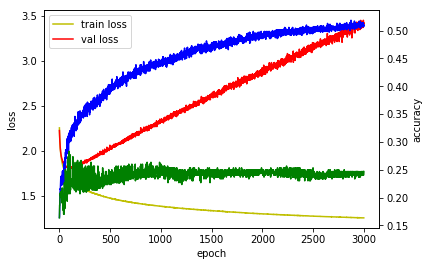

In [23]:
figs, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [26]:
res = model.evaluate(xTest, yTest, batch_size=32)
print("cost:"+ str(res[0]))
print("accuracy:"+ str(res[1]))

10000/10000 [==============================] - 0s 15us/step
cost:3.706244239425659
accuracy:0.2597000002861023


In [27]:
#조기 종료: earlystopping
#callback (함수): 어떤 상황이 되었을 때(val loss가 떨어지다가 다시 올라가기 시작한 시점), 
#함수 내에서 또 다른 어떤 함수를 호출하는 함수

In [28]:
from keras.callbacks import EarlyStopping

In [32]:
es = EarlyStopping(patience=30)

In [33]:
hist = model.fit(xTrain,yTrain,epochs=3000, batch_size=10, validation_data=(xVal,yVal), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 123us/step - loss: 1.2585 - accuracy: 0.5114 - val_loss: 3.4252 - val_accuracy: 0.2433
Epoch 2/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2583 - accuracy: 0.5143 - val_loss: 3.4071 - val_accuracy: 0.2433
Epoch 3/3000
700/700 [==============================] - 0s 106us/step - loss: 1.2588 - accuracy: 0.5114 - val_loss: 3.3381 - val_accuracy: 0.2400
Epoch 4/3000
700/700 [==============================] - 0s 107us/step - loss: 1.2589 - accuracy: 0.5086 - val_loss: 3.3982 - val_accuracy: 0.2433
Epoch 5/3000
700/700 [==============================] - 0s 107us/step - loss: 1.2585 - accuracy: 0.5100 - val_loss: 3.4151 - val_accuracy: 0.2367
Epoch 6/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2581 - accuracy: 0.5143 - val_loss: 3.4095 - val_accuracy: 0.2433
Epoch 7/3000
700/700 [==============================] - 0s 113us/step - loss: 

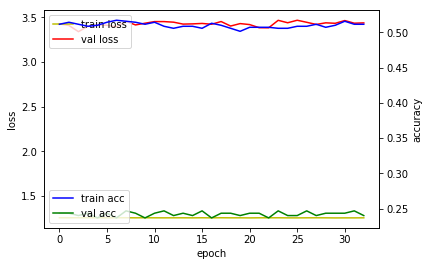

In [34]:
figs, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [50]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [86]:
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)

In [87]:
dataset = np.loadtxt("dataset (1)/ThoraricSurgery.csv", delimiter=",")

In [88]:
np.shape(dataset)

(470, 18)

In [89]:
x = dataset[:,0:17]
y = dataset[:,17] #1: 수술 후 생존, 0: 사망

In [90]:
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [94]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [95]:
model.fit(x,y, epochs=30, batch_size=10)

Epoch 1/30
470/470 [==============================] - 0s 447us/step - loss: 0.6485 - accuracy: 0.3234
Epoch 2/30
470/470 [==============================] - 0s 89us/step - loss: 0.1497 - accuracy: 0.8489
Epoch 3/30
470/470 [==============================] - 0s 83us/step - loss: 0.1486 - accuracy: 0.8511
Epoch 4/30
470/470 [==============================] - 0s 87us/step - loss: 0.1481 - accuracy: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 87us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 87us/step - loss: 0.1485 - accuracy: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 81us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 85us/step - loss: 0.1486 - accuracy: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 89us/step - loss: 0.1478 - accuracy: 0.8532
Epoch 10/30
470/470 [==============================] - 0s 87us/step - loss: 0.1474 - accur

In [99]:
print(model.evaluate(x,y)[1])

470/470 [==============================] - 0s 21us/step
0.8510638475418091


In [102]:
xy = np.loadtxt("실습데이터/실습데이터/data-03-diabetes.csv", delimiter=",")
xy

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]])

In [105]:
xdata = xy[:,0:-1]
ydata = xy[:,[-1]]

In [106]:
print(xdata.shape, ydata.shape)

(759, 8) (759, 1)


In [107]:
w = tf.Variable(tf.random_normal([8,1]))
b = tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32, shape=[None,8])
y = tf.placeholder(tf.float32, shape=[None,1])

In [108]:
hf = tf.sigmoid(tf.matmul(x,w)+b)
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [109]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [110]:
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [113]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv,_ = sess.run([cost,train], feed_dict={x:xdata,y:ydata})
        if step%200==0:
            print(step,cv)
    hv,pv,av = sess.run([hf,predicted,accuracy], feed_dict={x:xdata, y:ydata})
    print(hv,pv,av)

0 0.8359697
200 0.80319196
400 0.7740957
600 0.7479811
800 0.7245134
1000 0.70343196
1200 0.6844999
1400 0.66749644
1600 0.6522184
1800 0.638479
2000 0.6261095
2200 0.614958
2400 0.60488886
2600 0.59578115
2800 0.5875278
3000 0.58003426
3200 0.57321656
3400 0.56700087
3600 0.56132257
3800 0.5561241
4000 0.55135506
4200 0.5469711
4400 0.54293287
4600 0.539206
4800 0.53575975
5000 0.53256726
5200 0.5296044
5400 0.52685
5600 0.524285
5800 0.5218928
6000 0.5196582
6200 0.5175677
6400 0.51560926
6600 0.51377225
6800 0.51204664
7000 0.51042366
7200 0.5088955
7400 0.5074549
7600 0.5060953
7800 0.50481075
8000 0.5035959
8200 0.5024457
8400 0.5013559
8600 0.50032204
8800 0.4993406
9000 0.49840805
9200 0.49752116
9400 0.49667695
9600 0.49587294
9800 0.4951064
10000 0.4943751
[[0.4230725 ]
 [0.914369  ]
 [0.14699051]
 [0.94097066]
 [0.2386195 ]
 [0.6912104 ]
 [0.94149905]
 [0.6192848 ]
 [0.22873637]
 [0.52304906]
 [0.7228858 ]
 [0.18578693]
 [0.20333445]
 [0.29197645]
 [0.7200069 ]
 [0.5596808 ]


In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
car = pd.read_csv("carsdata/cars.csv")
car

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [3]:
xtrain = car[' cylinders']
ytrain = car[' hp']

In [4]:
xtrain = list(xtrain.values)
ytrain = list(ytrain.values)

In [5]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

In [6]:
hf = xtrain*w+b

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
#모델
hf = xtrain*w+b
cost = tf.reduce_mean(tf.square(hf-ytrain))

In [9]:
opt = tf.train.GradientDescentOptimizer(0.01) #learning rante: 0.01
train = opt.minimize(cost) #경사 하강

In [10]:
for step in range(4001): #training: 3300
    sess.run(train)
    if step%100==0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))
    

0 1569.7896 [13.26929] [0.9219017]
100 468.97632 [18.939503] [0.9079638]
200 468.36075 [19.066114] [0.13433558]
300 467.92303 [19.17289] [-0.51808536]
400 467.61172 [19.262936] [-1.0682861]
500 467.39035 [19.338875] [-1.5322839]
600 467.23288 [19.402916] [-1.9235836]
700 467.12082 [19.456923] [-2.2535748]
800 467.04123 [19.502466] [-2.5318666]
900 466.9846 [19.540876] [-2.766555]
1000 466.94437 [19.573267] [-2.964473]
1100 466.91556 [19.600584] [-3.131383]
1200 466.8953 [19.623621] [-3.2721405]
1300 466.8808 [19.643047] [-3.3908463]
1400 466.8705 [19.659431] [-3.4909523]
1500 466.8632 [19.673248] [-3.575372]
1600 466.858 [19.6849] [-3.6465683]
1700 466.85422 [19.694725] [-3.7066085]
1800 466.8516 [19.703012] [-3.757239]
1900 466.84976 [19.710001] [-3.7999382]
2000 466.8484 [19.715893] [-3.8359473]
2100 466.8474 [19.720863] [-3.8663163]
2200 466.8467 [19.725056] [-3.891927]
2300 466.84628 [19.72859] [-3.9135258]
2400 466.84598 [19.731571] [-3.9317403]
2500 466.84567 [19.734085] [-3.9470